# Importando base de dados e análise inicial dos dados

In [1]:
import pandas as pd

In [2]:
resenhas = pd.read_csv('imdb-reviews-pt-br.csv')
resenhas.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [3]:
#Analisando texto negativos
print("Negativa \n")
print(resenhas.text_pt[189])

Negativa 

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


In [4]:
#Analisando texto positivos
print("Positivo \n")
print(resenhas.text_pt[49002])

Positivo 

Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maio

In [5]:
#Verificando se os dados são balanceados
resenhas['sentiment'].value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

In [6]:
#Renomeando no padrão
classificacao = resenhas['sentiment'].replace(['neg', 'pos'], [0, 1])
classificacao

0        0
1        0
2        0
3        0
4        0
        ..
49454    1
49455    1
49456    1
49457    1
49458    1
Name: sentiment, Length: 49459, dtype: int64

In [7]:
resenhas['classificacao'] = classificacao
resenhas.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


# Bags of words

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [9]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    
    X_train, X_test, y_train, y_test = train_test_split(bag_of_words,
                                                        texto[coluna_classificacao],
                                                              random_state = 42)
    
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(X_train, y_train)
    return regressao_logistica.score(X_test, y_test)
    

In [10]:
print(classificar_texto(resenhas, "text_pt", "classificacao"))

0.6583097452486858


# Word Cloud

In [11]:
%matplotlib inline
from wordcloud import WordCloud
import matplotlib.pyplot as plt


Bad key text.latex.preview in file c:\users\thayanne\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file c:\users\thayanne\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file c:\users\thayanne\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('s

In [12]:
all_words = ' '.join([texto for texto in resenhas["text_pt"]])

In [13]:
len(all_words)

63448424

In [14]:
#collocations retirar os bigramas
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(all_words)

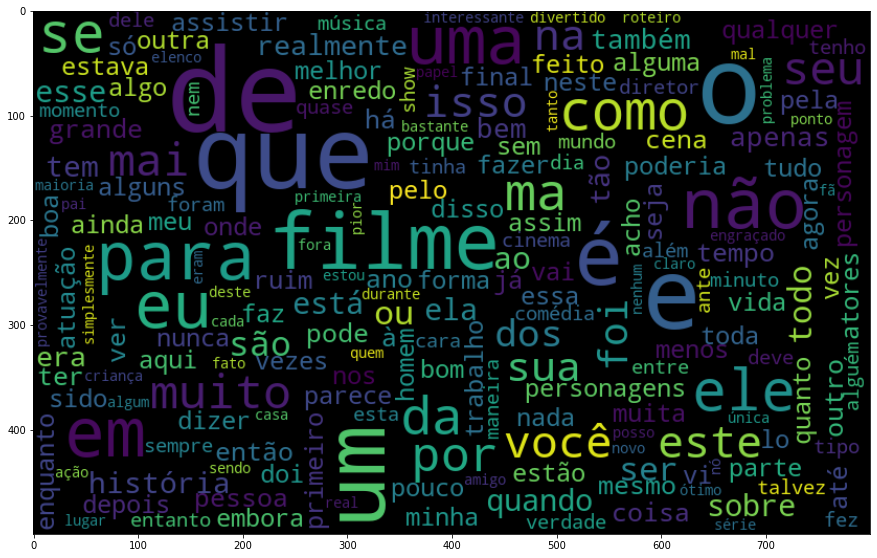

In [15]:
plt.figure(figsize=(15, 10))
plt.imshow(nuvem_palavras, interpolation='bilinear')

### Nuvem de palavas por sentimento

In [16]:
def nuvem_palavras(texto, coluna_texto, sentimento):
    texto_sentimento = resenhas.query("sentiment == @sentimento")
    all_words = ' '.join([texto for texto in texto[coluna_texto]])
    
    nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(all_words)
    plt.figure(figsize=(15, 10))
    plt.axis('off')
    plt.imshow(nuvem_palavras, interpolation='bilinear')

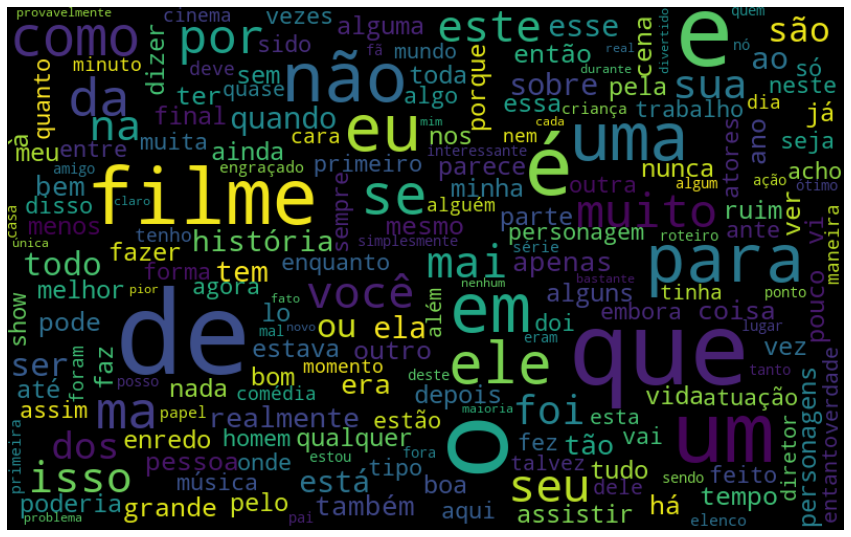

In [17]:
#Positivos
nuvem_palavras(resenhas, "text_pt", 'pos')

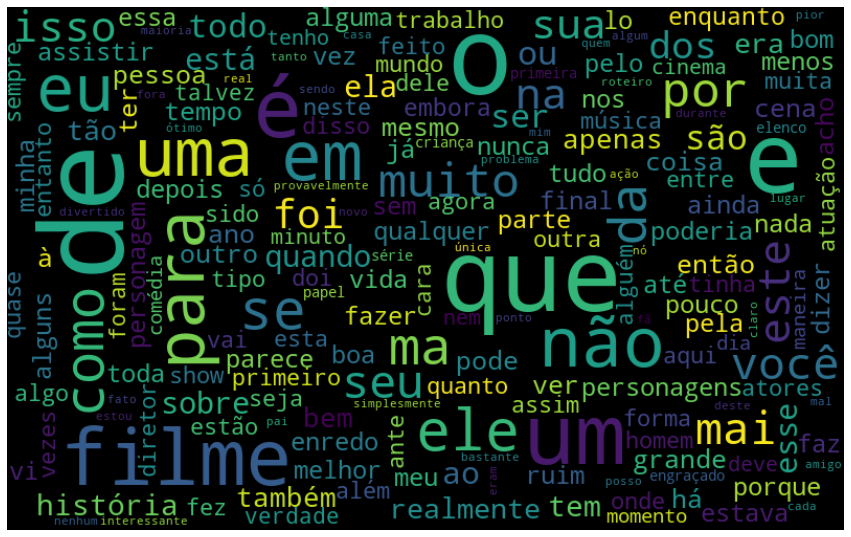

In [18]:
#Negativos
nuvem_palavras(resenhas, "text_pt", 'neg')

# NLTK

In [ ]:
import nltk

nltk.download("all")

In [20]:
from nltk import tokenize

token_espaco = tokenize.WhitespaceTokenizer()

In [21]:
token_frase = token_espaco.tokenize(all_words)
frequencia = nltk.FreqDist(token_frase)
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequência": list(frequencia.values())})

In [22]:
df_frequencia

,Palavra,Frequência
0,Mais,1538
1,uma,130888
2,"vez,",1927
3,o,244881
4,Sr.,1741
...,...,...
348280,"Muppified,",1
348281,inventora,1
348282,"""Union",1
348283,beirar,1


In [28]:
top_10 = df_frequencia.nlargest(columns = "Frequência", n = 10)
top_10

,Palavra,Frequência
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


# Gráfico de Pareto

In [25]:
import seaborn as sns

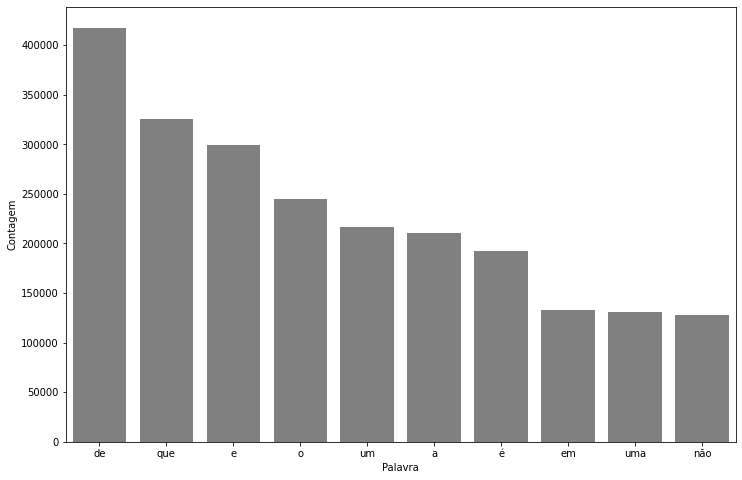

In [29]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=top_10, x='Palavra', y='Frequência', color='gray')
ax.set_ylabel("Contagem")
plt.show()

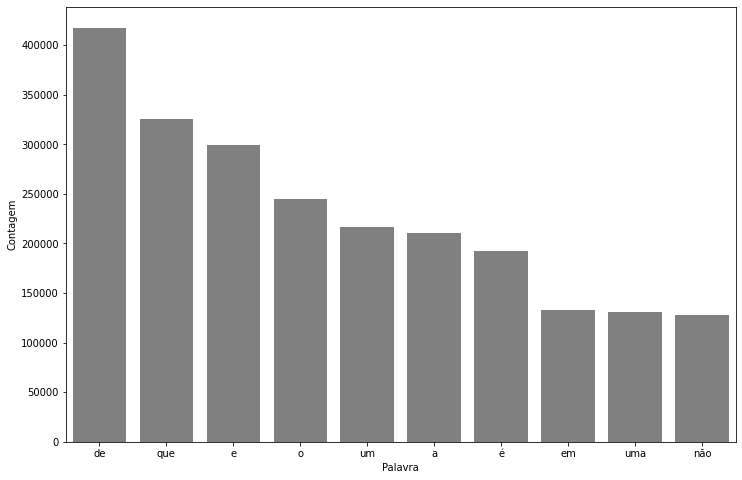

In [31]:
def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()

pareto(resenhas, "text_pt", 10)

# Stop words

In [32]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

In [33]:
len(palavras_irrelevantes)

204

In [ ]:
frase_processada = list()
for opiniao in resenha.text_pt:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha["tratamento_1"] = frase_processada

In [ ]:
classificar_texto(resenha, "tratamento_1", "classificacao")

In [ ]:
pareto(resenha,"tratamento_1", 10)

In [24]:
#matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())
#matriz_esparsa.head()